### Packages

In [288]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib
import squarify
import matplotlib.ticker as mtick
import networkx as nx

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set()

### Data

In [289]:
df = pd.read_csv("fema.csv")
df.head(3)

,state,disasterNumber,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,declarationDate,year.month,fyDeclared,disasterType,...,disasterCloseOutDate,declaredCountyArea,placeCode,hash,lastRefresh,region,avgIndex,Size..sq.mi.,GDP.bil,qstatesize
0,AK,1423,0,1,1,1,2002-06-26T20:00:00.000Z,2002-06,2002,DR,...,2010-05-26T12:00:00.000Z,Bethel (Census Area),99050.0,919f483a59f874fac39edf0ecc982105,2018-02-09T14:39:14.106Z,region10,0.66,570641,43.1,7
1,AK,2542,0,0,1,0,2004-08-10T21:33:00.000Z,2004-08,2004,FM,...,2008-01-03T00:00:00.000Z,Yukon Flats Regional Educational Attendance Area,86640.0,336b4a82026fde83fc5ce274bacfeba4,2018-02-09T14:39:43.930Z,region10,0.66,570641,43.1,7
2,AK,1461,1,1,1,1,2003-04-26T11:50:00.000Z,2003-04,2003,DR,...,2010-08-12T00:00:00.000Z,Matanuska-Susitna (Borough),99170.0,1b0ece15148a18f1370f1aba695a6463,2018-02-09T14:39:15.830Z,region10,0.66,570641,43.1,7


### Histogram

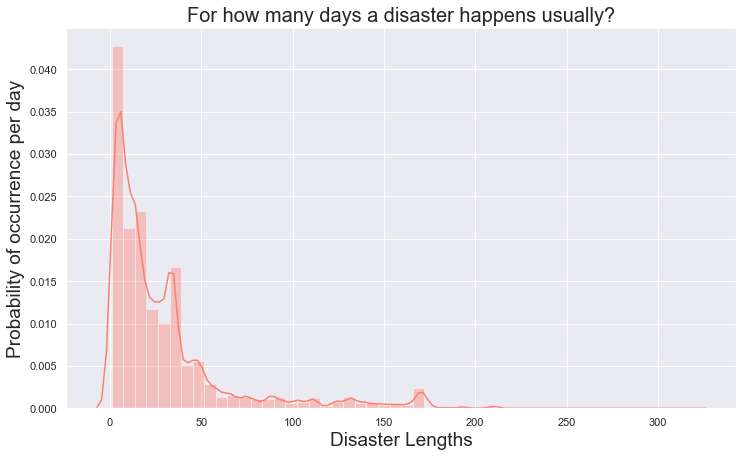

In [290]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 7)
sns.distplot(data_2['DisasterLength'], color="salmon"); # spread of incidents
plt.xlabel("Disaster Lengths", fontsize=19)
plt.ylabel("Probability of occurrence per day", fontsize=19)
plt.title("For how many days a disaster happens usually?", fontsize=20);

### Barplot

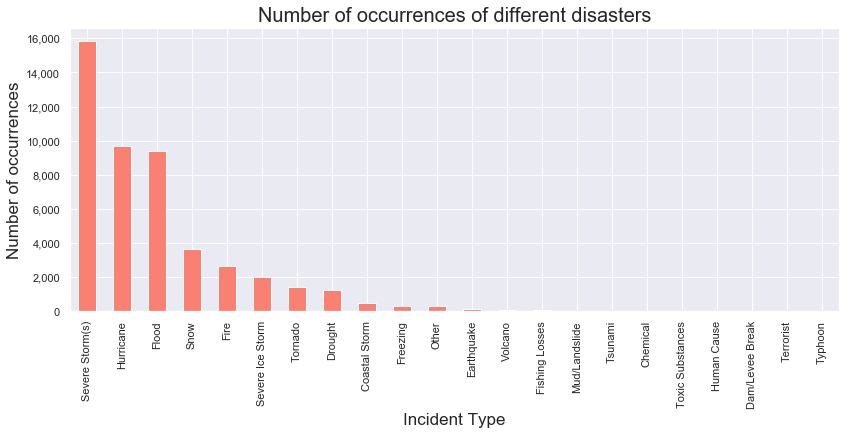

In [291]:
df['incidentBeginDate'] = pd.to_datetime(df['incidentBeginDate']).dt.date
df['incidentEndDate'] = pd.to_datetime(df['incidentEndDate']).dt.date

fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
df['incidentType'].value_counts().plot(kind='bar', color="salmon")
plt.xlabel("Incident Type", fontsize=17)
plt.ylabel("Number of occurrences", fontsize=17)

ax.get_yaxis().set_major_formatter(
     mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.title("Number of occurrences of different disasters", fontsize=20);

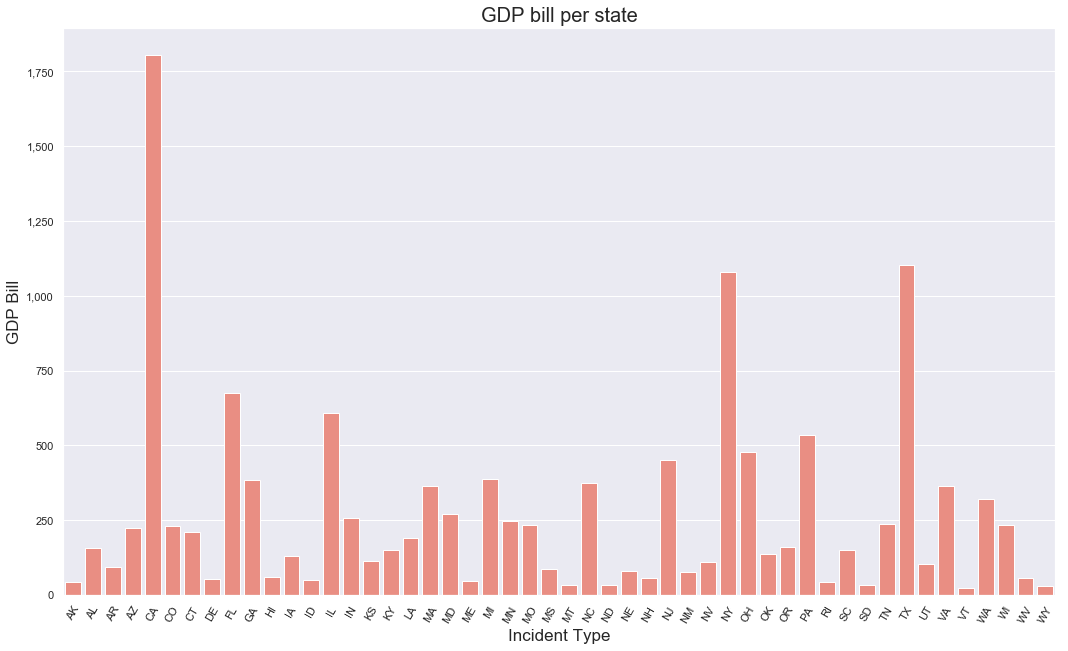

In [292]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 9)

ax = sns.barplot(x='state', y="GDP.bil", data=df,
                 color="salmon")

plt.xticks(rotation=60)
plt.xlabel("Incident Type", fontsize=17)
plt.ylabel("GDP Bill", fontsize=17)
ax.get_yaxis().set_major_formatter(
     mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()
plt.title("GDP bill per state", fontsize=20);

### Boxplot

In [293]:
data_1 = pd.DataFrame({"incidentType":df.incidentType})
data_1['disasterType'] = df['disasterType']
data_1['DisasterLength'] = df['DisasterLength']
data_1['state'] = df['state']

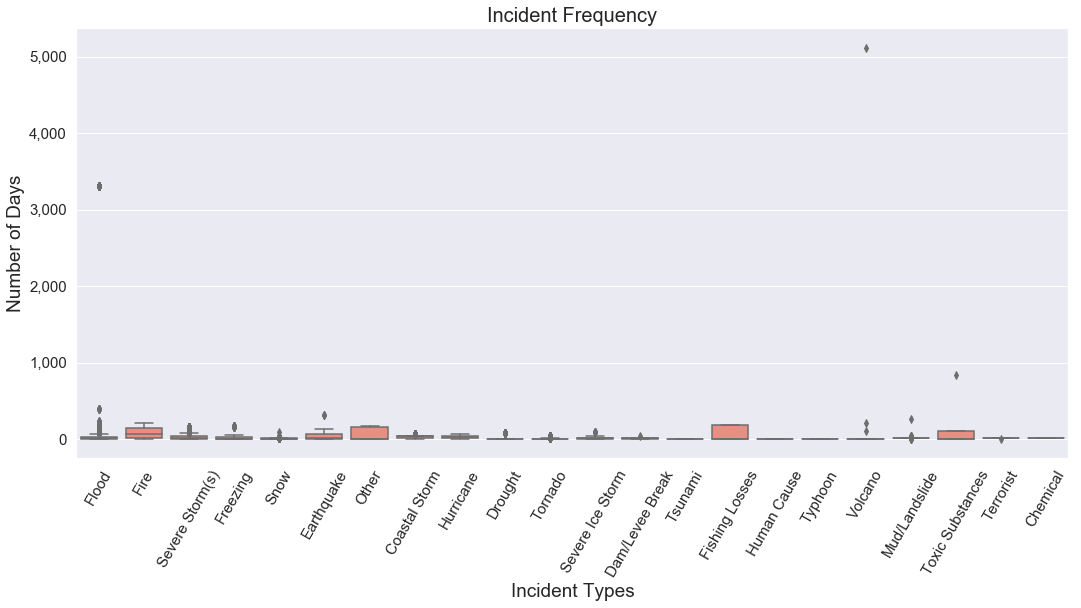

In [294]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
sns.boxplot(x="incidentType", y="DisasterLength", data=data_1, color="salmon")
plt.xlabel("Incident Types", fontsize=19)
plt.ylabel("Number of Days", fontsize=19)
plt.tight_layout()
plt.xticks(rotation=60, fontsize=15)
plt.yticks(fontsize=15)
ax.get_yaxis().set_major_formatter(
     mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title("Incident Frequency", fontsize=20);

**Note** : Graph is skewed due to volcano which exists for years. We need to remove that before visualizing further.

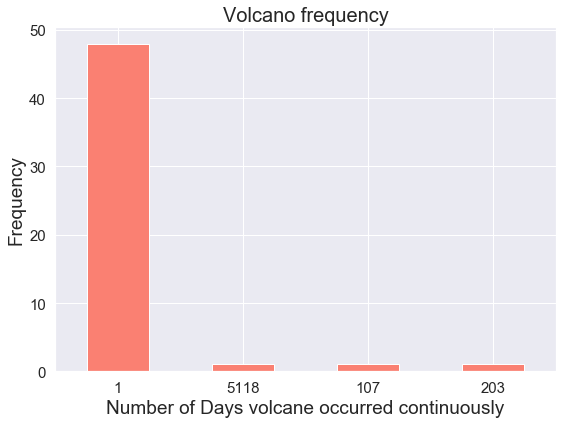

In [295]:
# Volcano specific graph

data_3 = data_1[data_1.incidentType=="Volcano"]
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

data_3[data_3['incidentType']=="Volcano"]["DisasterLength"].value_counts().plot(kind='bar', color="salmon")

plt.xlabel("Number of Days volcane occurred continuously", fontsize=19)
plt.ylabel("Frequency", fontsize=19)
plt.tight_layout()
plt.xticks(rotation=0, fontsize=15)
plt.yticks(fontsize=15)
ax.get_yaxis().set_major_formatter(
     mtick.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title("Volcano frequency", fontsize=20);

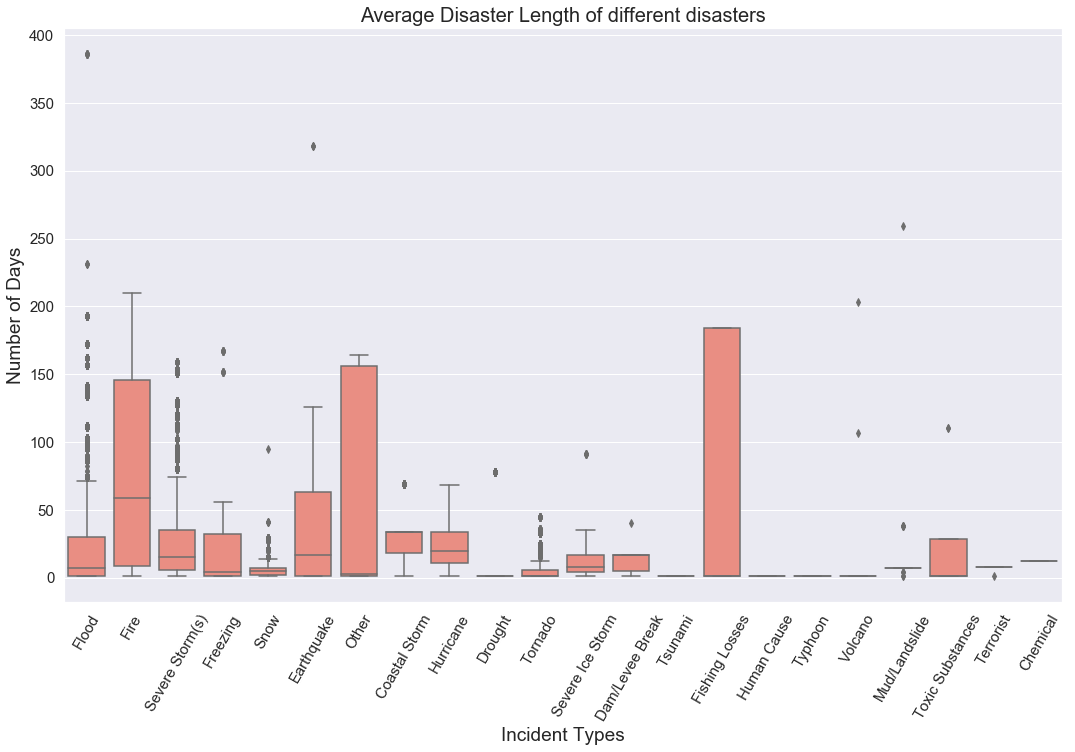

In [296]:
data_2 = data_1[(data_1.DisasterLength<500) & (data_1.DisasterLength>0)]  # remove outliers

fig, ax = plt.subplots()
fig.set_size_inches(15, 9)
sns.boxplot(x="incidentType", y="DisasterLength", data=data_2, color="salmon");
plt.xlabel("Incident Types", fontsize=19)
plt.ylabel("Number of Days", fontsize=19)
plt.tight_layout()
plt.xticks(rotation=60, fontsize=15)
plt.yticks(fontsize=15)
plt.title("Average Disaster Length of different disasters", fontsize=20);


### Scatterplot

In [297]:
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)

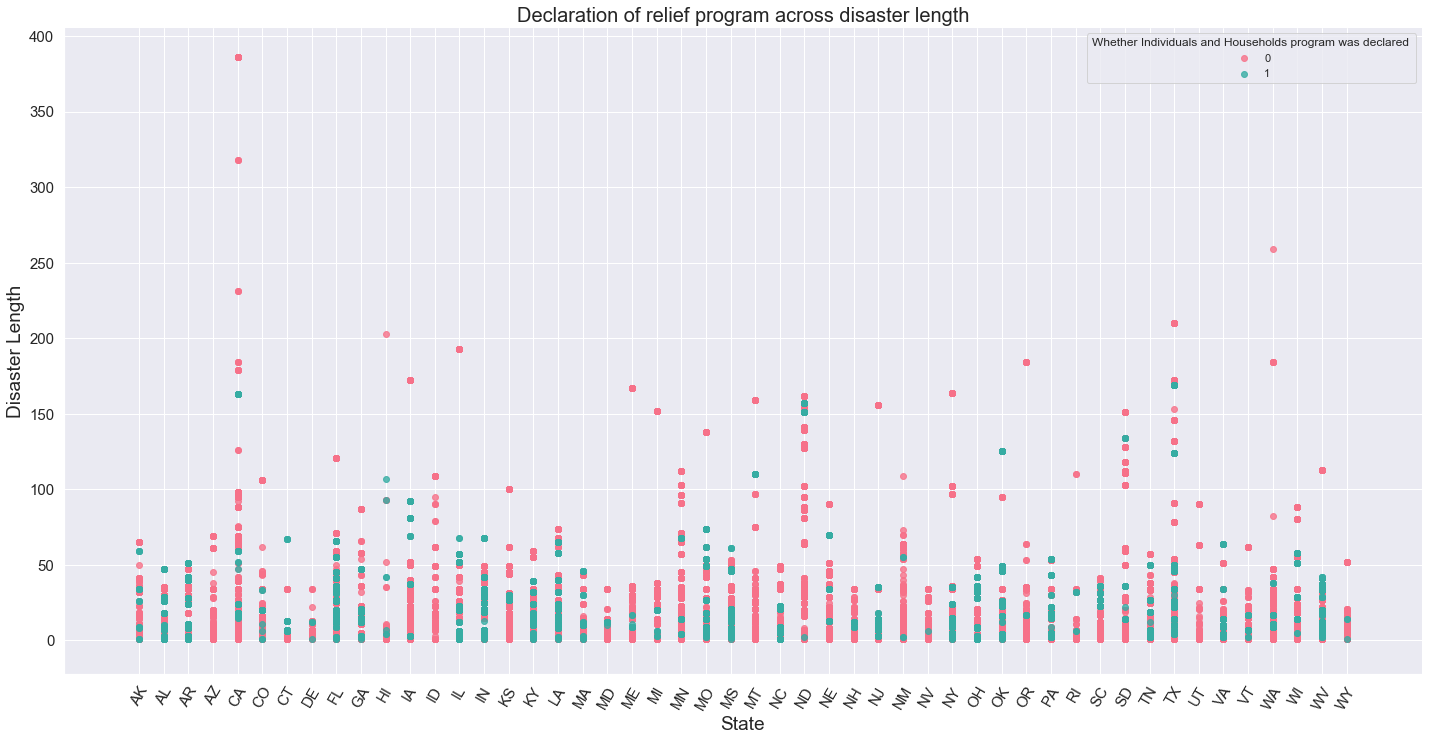

In [298]:
data_scatterplot = df[(df.DisasterLength<400) & (df.DisasterLength>0)]  # remove outliers

sns.lmplot( x="state", y="DisasterLength", 
           data=data_scatterplot, 
           fit_reg=False, 
           hue='ihProgramDeclared', 
           legend=False,
           palette="husl")
plt.gcf().set_size_inches(20, 10) 

plt.legend(title='Whether Individuals and Households program was declared ',loc='upper right')
plt.xlabel("State", fontsize=19)
plt.ylabel("Disaster Length", fontsize=19)
plt.tight_layout()
plt.xticks(rotation=60, fontsize=15)
plt.yticks(fontsize=15)
plt.title("Declaration of relief program across disaster length", fontsize=20);


### Bubblemap

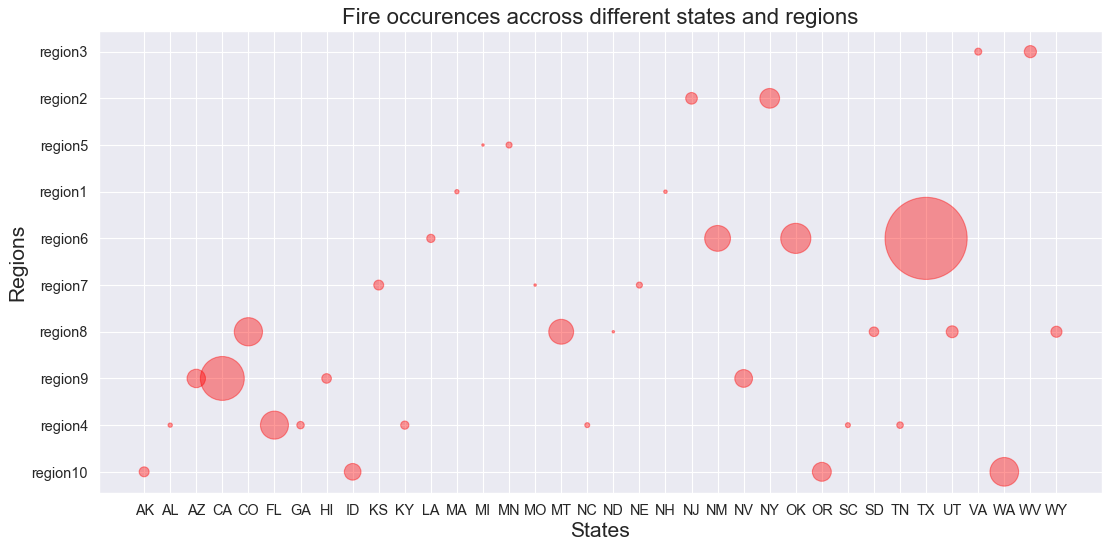

In [299]:
data = df[df.incidentType == 'Fire'].groupby(['region','state']).size().reset_index()
data.columns = ['Region', 'State', 'Size']
data = data.sort_values(by=['State'], ascending=True)

plt.figure(figsize=(14,7), dpi= 80)
plt.scatter(y=data.Region, x=data.State,s=data.Size*5, alpha = 0.4, c="red")
plt.title("Fire occurences accross different states and regions", fontsize=20)
plt.xlabel("States", fontsize=19)
plt.ylabel("Regions", fontsize=19)
plt.tight_layout()
plt.xticks(rotation=0, fontsize=13)
plt.yticks(fontsize=13);

### Connections
- showing the states under each region. ( region 1 - 10 ()

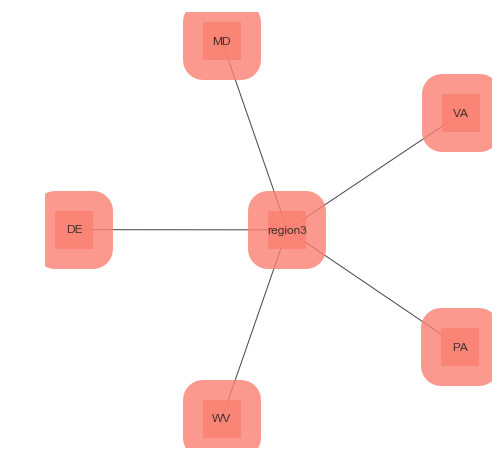

In [340]:
%matplotlib inline
conn = pd.DataFrame({'from':['region3']*len(df.state[df.region=='region3'].unique()),
                     'to':df.state[df.region=='region3'].unique()})
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
G=nx.from_pandas_edgelist(conn, 'from', 'to')
nx.draw(G, with_labels=True, node_size=1500, node_color="salmon", node_shape="s", alpha=0.8, linewidths=40)
plt.show()
 

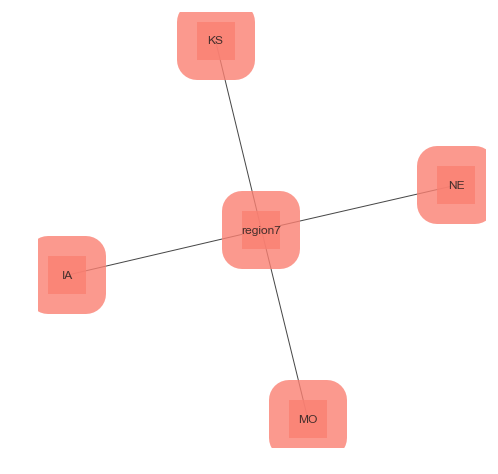

In [345]:
%matplotlib inline
conn = pd.DataFrame({'from':['region7']*len(df.state[df.region=='region7'].unique()),
                     'to':df.state[df.region=='region7'].unique()})
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
G=nx.from_pandas_edgelist(conn, 'from', 'to')
nx.draw(G, with_labels=True, node_size=1500, node_color="salmon", node_shape="s", alpha=0.8, linewidths=40)
plt.show()

### Heatmap

In [316]:
st = df['state'].unique()
dis = ['DR', 'FM', 'FS', 'EM']

S = []
D = []
for s in st:
    for d in dis:
        S.append(s)
        D.append(d)
        
df3 = pd.DataFrame({"state": S, "DisasterType":D})
df3['count'] = df3[['state','DisasterType']].apply(lambda x: df[(df.state==x[0]) & (df.disasterType==x[1])]['disasterType'].shape[0], axis=1)
df3 = df3.pivot("DisasterType", "state", "count")

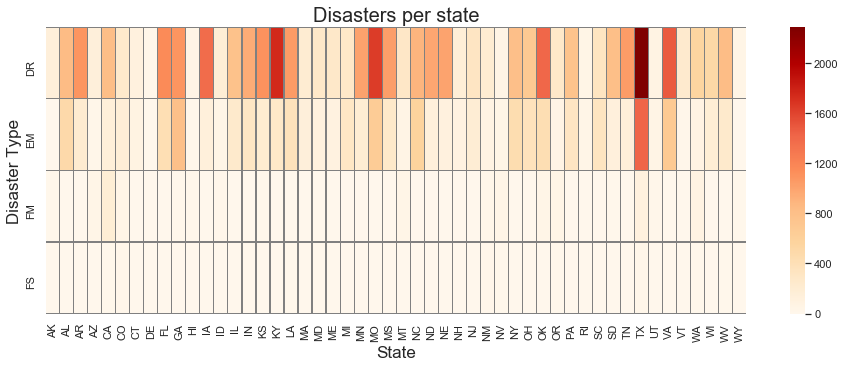

In [317]:
fig, ax = plt.subplots()
fig.set_size_inches(13, 5)
ax = sns.heatmap(df3, cmap='OrRd', linewidth=0.1, linecolor='gray')

#plt.xticks(rotation=60)
plt.xlabel("State", fontsize=17)
plt.ylabel("Disaster Type", fontsize=17)
plt.tight_layout()
plt.title("Disasters per state", fontsize=20);

In [318]:
st = df['state'].unique()
ind = list(df['incidentType'].unique())

S = []
D = []
for s in st:
    for d in ind:
        S.append(s)
        D.append(d)
        
df3 = pd.DataFrame({"state": S, "IncidentType":D})
df3['count'] = df3[['state','IncidentType']].apply(lambda x: df[(df.state==x[0]) & (df.incidentType==x[1])]['incidentType'].shape[0], axis=1)
df3 = df3.pivot("state", "IncidentType","count")

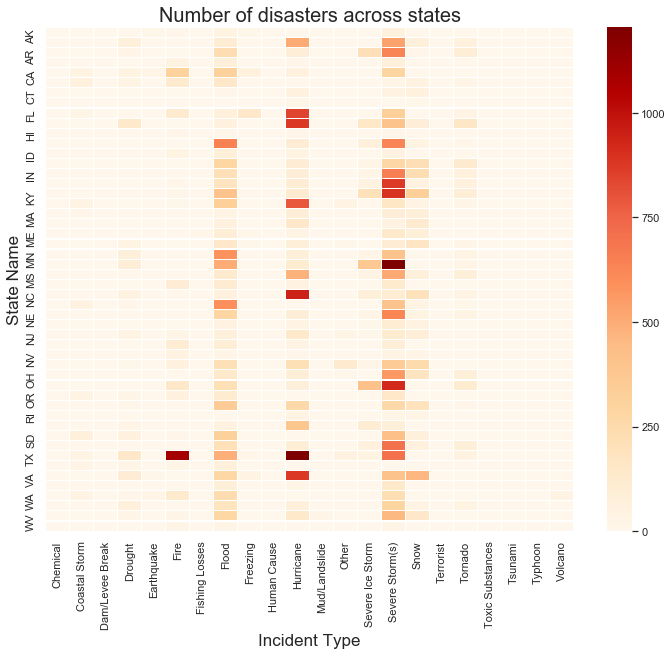

In [319]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 9)
ax = sns.heatmap(df3, cmap='OrRd', linewidth=0.1)

#plt.xticks(rotation=60)
plt.xlabel("Incident Type", fontsize=17)
plt.ylabel("State Name", fontsize=17)
plt.tight_layout()
plt.title("Number of disasters across states", fontsize=20);

### Stacked plot

In [320]:
st = df['state'].unique()
dis = ['DR', 'FM', 'FS', 'EM']
S = []
D = []
for s in st:
    for d in dis:
        S.append(s)
        D.append(d)
df3 = pd.DataFrame({"state": S, "DisasterType":D})
df3['count'] = df3[['state','DisasterType']].apply(lambda x: df[(df.state==x[0]) & (df.disasterType==x[1])]['disasterType'].shape[0], axis=1)
df3 = df3.pivot("DisasterType", "state", "count")


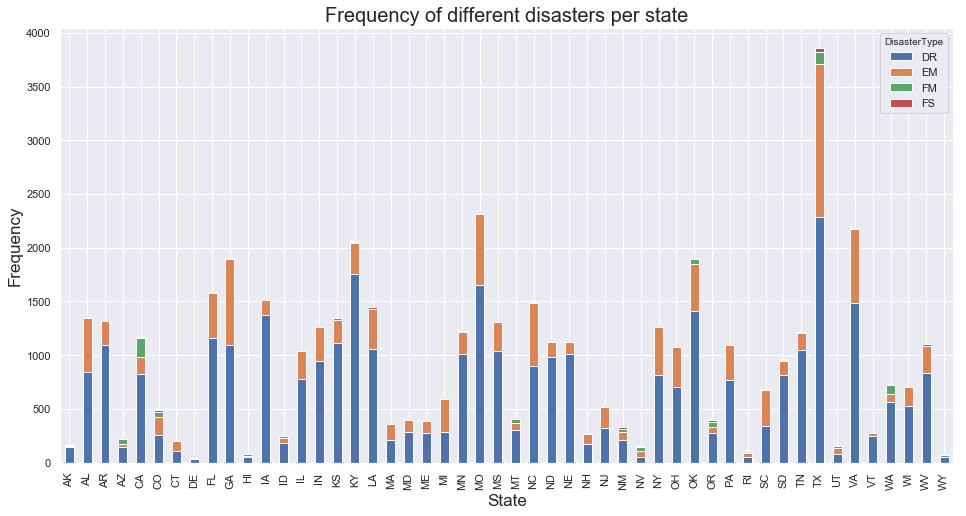

In [321]:
df3_transposed = df3.T
df3_transposed.loc[:,:].plot.bar(stacked=True, figsize=(16,8))
plt.xlabel("State", fontsize=17)
plt.ylabel("Frequency", fontsize=17)
plt.title("Frequency of different disasters per state", fontsize=20);

## Interactive Plot

In [322]:
data_2['year'] = df['year.month'].str.split("-").apply(lambda x: x[0])
data_2['month'] = df['year.month'].str.split("-").apply(lambda x: x[1])

**Visuals from year 1990 onwards**

In [323]:
data_2 = data_2[data_2['year'].apply(lambda x: x if int(x)>=1990 else 0) !=0]

In [329]:
def disasterPerYear(inp):
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 9)

    palette = sns.color_palette("magma", 1)
    ax = sns.lineplot(x="year", y="DisasterLength",
                      hue="disasterType",
                      data=data_2[data_2.disasterType == inp],
                      palette=palette)

    plt.xlabel("Year", fontsize=19)
    plt.ylabel("Number of Days", fontsize=19)
    plt.tight_layout()
    plt.xticks(rotation=0, fontsize=15)
    plt.yticks(fontsize=15)
    plt.title("Year with maximum disasters", fontsize=20);

li = list(data_2.disasterType.unique())

Disaster Types: ['DR', 'FM', 'FS', 'EM']
Select the disaster type to visualize its frequency over the years : EM


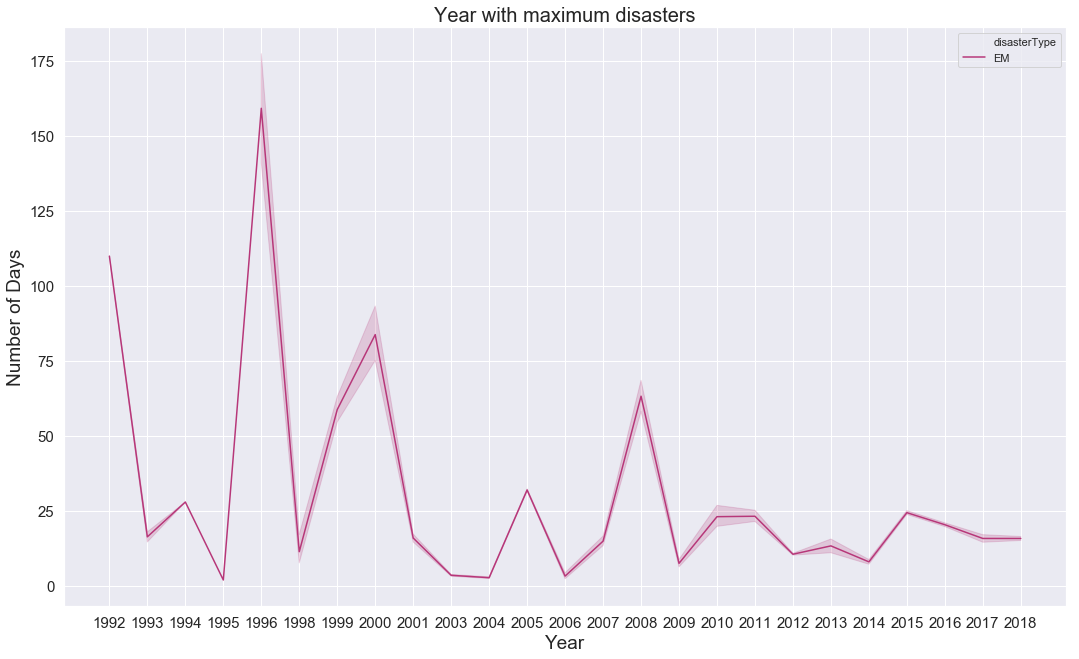

In [332]:
print(f"Disaster Types: {li}")
inp = input("Select the disaster type to visualize its frequency over the years : ")
disasterPerYear(inp)

**Monthly**

In [334]:
data_2['year_month'] = data_2.year + '_' + data_2.month
data_2 = pd.read_csv("sorted_dates.csv")

In [337]:
def disasterPerMonth(inp):
    #sns.set_style("whitegrid")
    #sns.set_style("whitegrid", {'axes.grid' : False})
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 6)

    data = data_2[data_2.disasterType == inp]
    xa = np.arange(len(data['year_month'].unique()))
    my_xticks = data['year_month'].unique()
    
    palette = sns.color_palette("magma", 1)
    ax = sns.lineplot(x="year_month", y="DisasterLength",
                      hue="disasterType",
                      data=data_2[data_2.disasterType == inp],
                      palette=palette,
                      lw=1)

    plt.xlabel("Year-Month", fontsize=19)
    plt.ylabel("Number of Days", fontsize=19)
    plt.tight_layout()
    #plt.xticks(rotation=90, fontsize=15)
    plt.xticks(xa[::6], my_xticks[::6], rotation=90, fontsize=10)
    plt.yticks(fontsize=15)
    plt.title("Disasters occurrences quarterly", fontsize=20);

Disaster Types: ['DR', 'FM', 'FS', 'EM']
Select the disaster type to visualize its frequency over the months for all years : FM


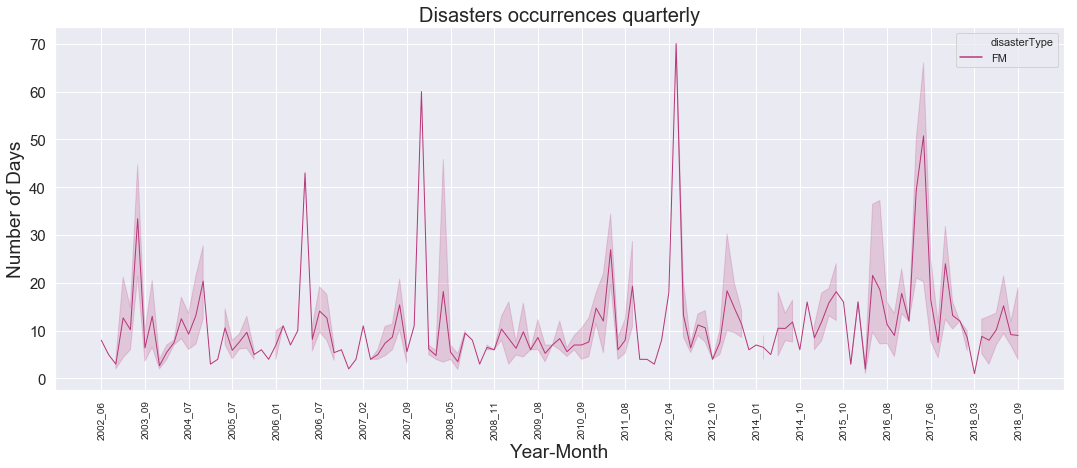

In [339]:
print(f"Disaster Types: {li}")
inp = input("Select the disaster type to visualize its frequency over the months for all years : ")
disasterPerMonth(inp)

**Note** : Shaded region indicates the confidence interval.